In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv("sales_order_line.csv")

In [3]:
sales.head()

,id,date_order,name,product_id,product_uom_qty,default_code,name.1
0,29082,2022-05-09 05:07:04,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD
1,29083,2022-05-09 05:10:10,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD
2,29084,2022-05-09 05:15:04,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD
3,29085,2022-05-09 05:16:55,FAMILY WOOD MOUSE GLUE TRAP 2'S,1923,12.0,101109101,AEON CO.(M) BHD
4,29085,2022-05-09 05:16:55,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD


In [4]:
sales.columns

Index(['id', 'date_order', 'name', 'product_id', 'product_uom_qty',
       'default_code', 'name.1'],
      dtype='object')

In [5]:
sales = sales.rename(columns={'id': 'order_id', 'date_order': 'order_date', 'name': 'product_name', 'product_uom_qty': 'sales_quantity', 'default_code': 'product_code', 'name.1': 'partner_name'})

In [6]:
sales.head()

,order_id,order_date,product_name,product_id,sales_quantity,product_code,partner_name
0,29082,2022-05-09 05:07:04,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD
1,29083,2022-05-09 05:10:10,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD
2,29084,2022-05-09 05:15:04,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD
3,29085,2022-05-09 05:16:55,FAMILY WOOD MOUSE GLUE TRAP 2'S,1923,12.0,101109101,AEON CO.(M) BHD
4,29085,2022-05-09 05:16:55,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        860 non-null    int64  
 1   order_date      860 non-null    object 
 2   product_name    860 non-null    object 
 3   product_id      860 non-null    int64  
 4   sales_quantity  860 non-null    float64
 5   product_code    860 non-null    object 
 6   partner_name    860 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 47.2+ KB


In [8]:
sales.isnull().sum()

order_id          0
order_date        0
product_name      0
product_id        0
sales_quantity    0
product_code      0
partner_name      0
dtype: int64

In [9]:
duplicate_rows = sales.duplicated()
print(sales[duplicate_rows])

Empty DataFrame
Columns: [order_id, order_date, product_name, product_id, sales_quantity, product_code, partner_name]
Index: []


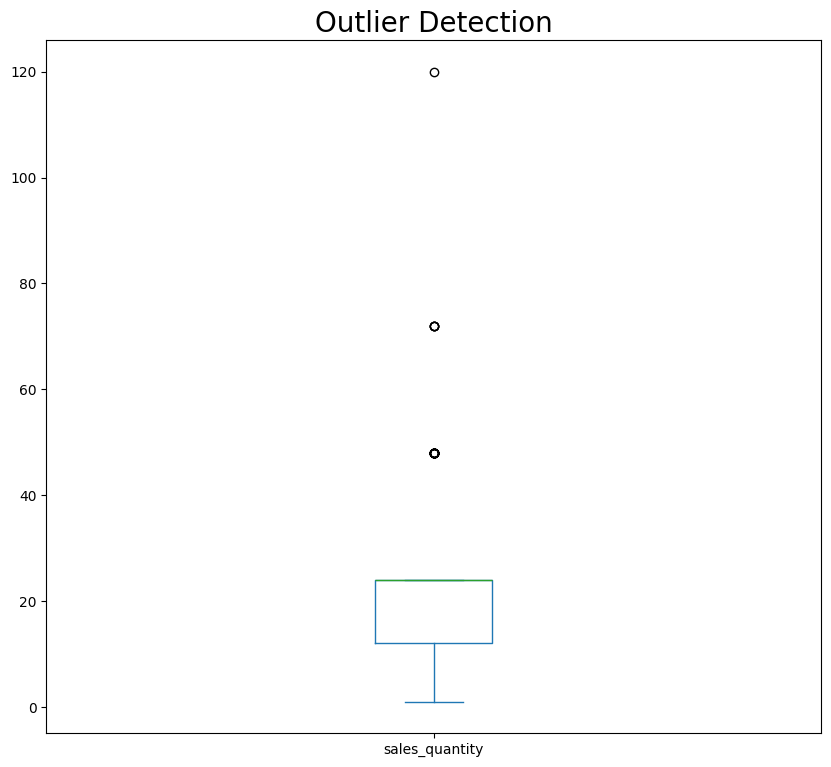

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
sales['sales_quantity'].plot(kind='box')
plt.title("Outlier Detection", fontsize=20)
plt.show()

In [11]:
# Convert Date column to datetime format
sales['order_date'] = pd.to_datetime(sales['order_date'])

sales['Month'] = sales['order_date'].dt.month
sales['Month_Name'] = sales['order_date'].dt.strftime('%B')

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        860 non-null    int64         
 1   order_date      860 non-null    datetime64[ns]
 2   product_name    860 non-null    object        
 3   product_id      860 non-null    int64         
 4   sales_quantity  860 non-null    float64       
 5   product_code    860 non-null    object        
 6   partner_name    860 non-null    object        
 7   Month           860 non-null    int32         
 8   Month_Name      860 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 57.2+ KB


In [13]:
sales.head()

,order_id,order_date,product_name,product_id,sales_quantity,product_code,partner_name,Month,Month_Name
0,29082,2022-05-09 05:07:04,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May
1,29083,2022-05-09 05:10:10,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May
2,29084,2022-05-09 05:15:04,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May
3,29085,2022-05-09 05:16:55,FAMILY WOOD MOUSE GLUE TRAP 2'S,1923,12.0,101109101,AEON CO.(M) BHD,5,May
4,29085,2022-05-09 05:16:55,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May


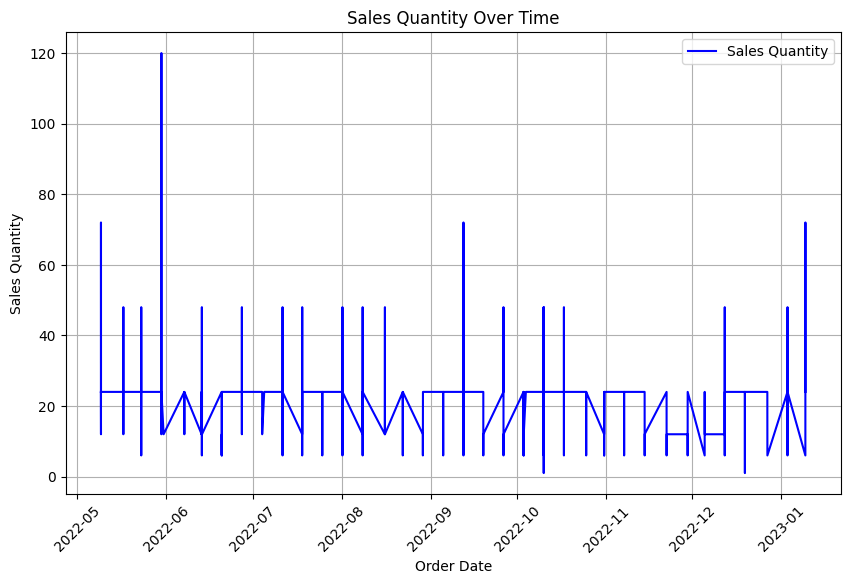

In [14]:
import matplotlib.pyplot as plt

# Ensure 'order_date' is set as the index and converted to datetime
sales.set_index('order_date', inplace=True)


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(sales.index, sales['sales_quantity'], label='Sales Quantity', color='blue')
plt.title('Sales Quantity Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.legend()  # Display legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [15]:
sales.info()
print("")

print("")
print(sales.index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 860 entries, 2022-05-09 05:07:04 to 2023-01-09 07:59:56
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        860 non-null    int64  
 1   product_name    860 non-null    object 
 2   product_id      860 non-null    int64  
 3   sales_quantity  860 non-null    float64
 4   product_code    860 non-null    object 
 5   partner_name    860 non-null    object 
 6   Month           860 non-null    int32  
 7   Month_Name      860 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 57.1+ KB


DatetimeIndex(['2022-05-09 05:07:04', '2022-05-09 05:10:10',
               '2022-05-09 05:15:04', '2022-05-09 05:16:55',
               '2022-05-09 05:16:55', '2022-05-09 05:32:20',
               '2022-05-09 05:32:20', '2022-05-09 05:34:11',
               '2022-05-09 05:35:52', '2022-05-09 05:35:52',
               ...
          

In [16]:
sales.head()

,order_id,product_name,product_id,sales_quantity,product_code,partner_name,Month,Month_Name
order_date,,,,,,,,
2022-05-09 05:07:04,29082,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May
2022-05-09 05:10:10,29083,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May
2022-05-09 05:15:04,29084,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May
2022-05-09 05:16:55,29085,FAMILY WOOD MOUSE GLUE TRAP 2'S,1923,12.0,101109101,AEON CO.(M) BHD,5,May
2022-05-09 05:16:55,29085,FAMILY ANT BAIT (GEL) 2'S,1925,24.0,101110303,AEON CO.(M) BHD,5,May


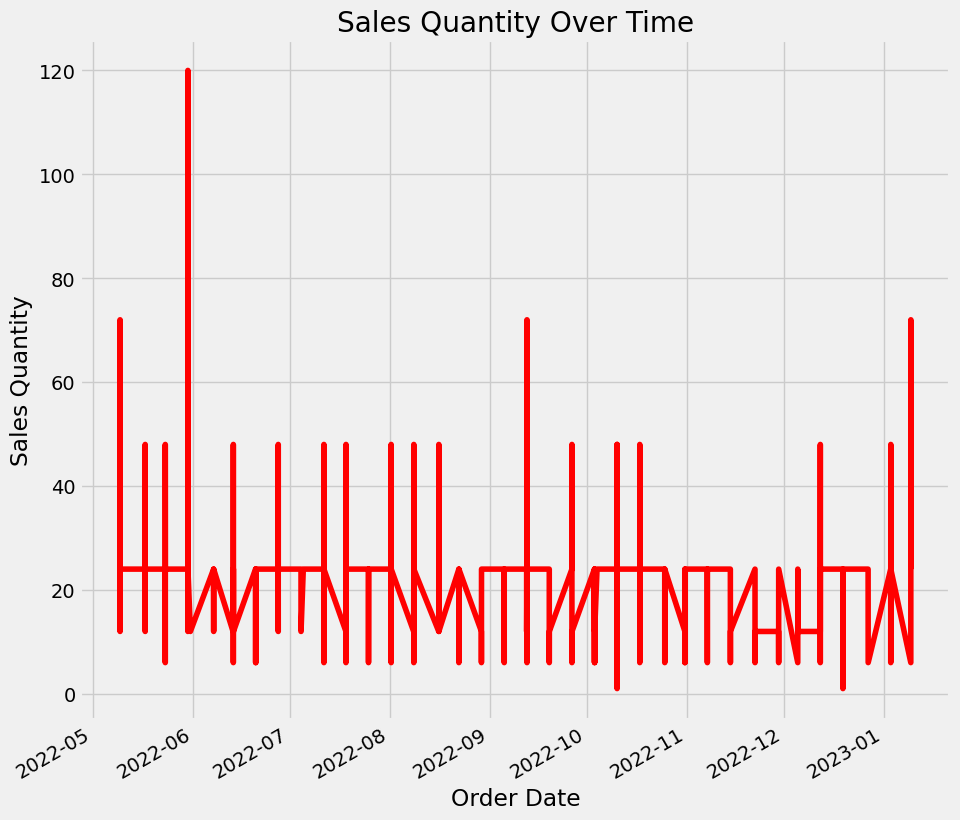

In [17]:
plt.style.use('fivethirtyeight')

sales['sales_quantity'].plot(figsize=(10, 10), color='red')
plt.title('Sales Quantity Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.show()

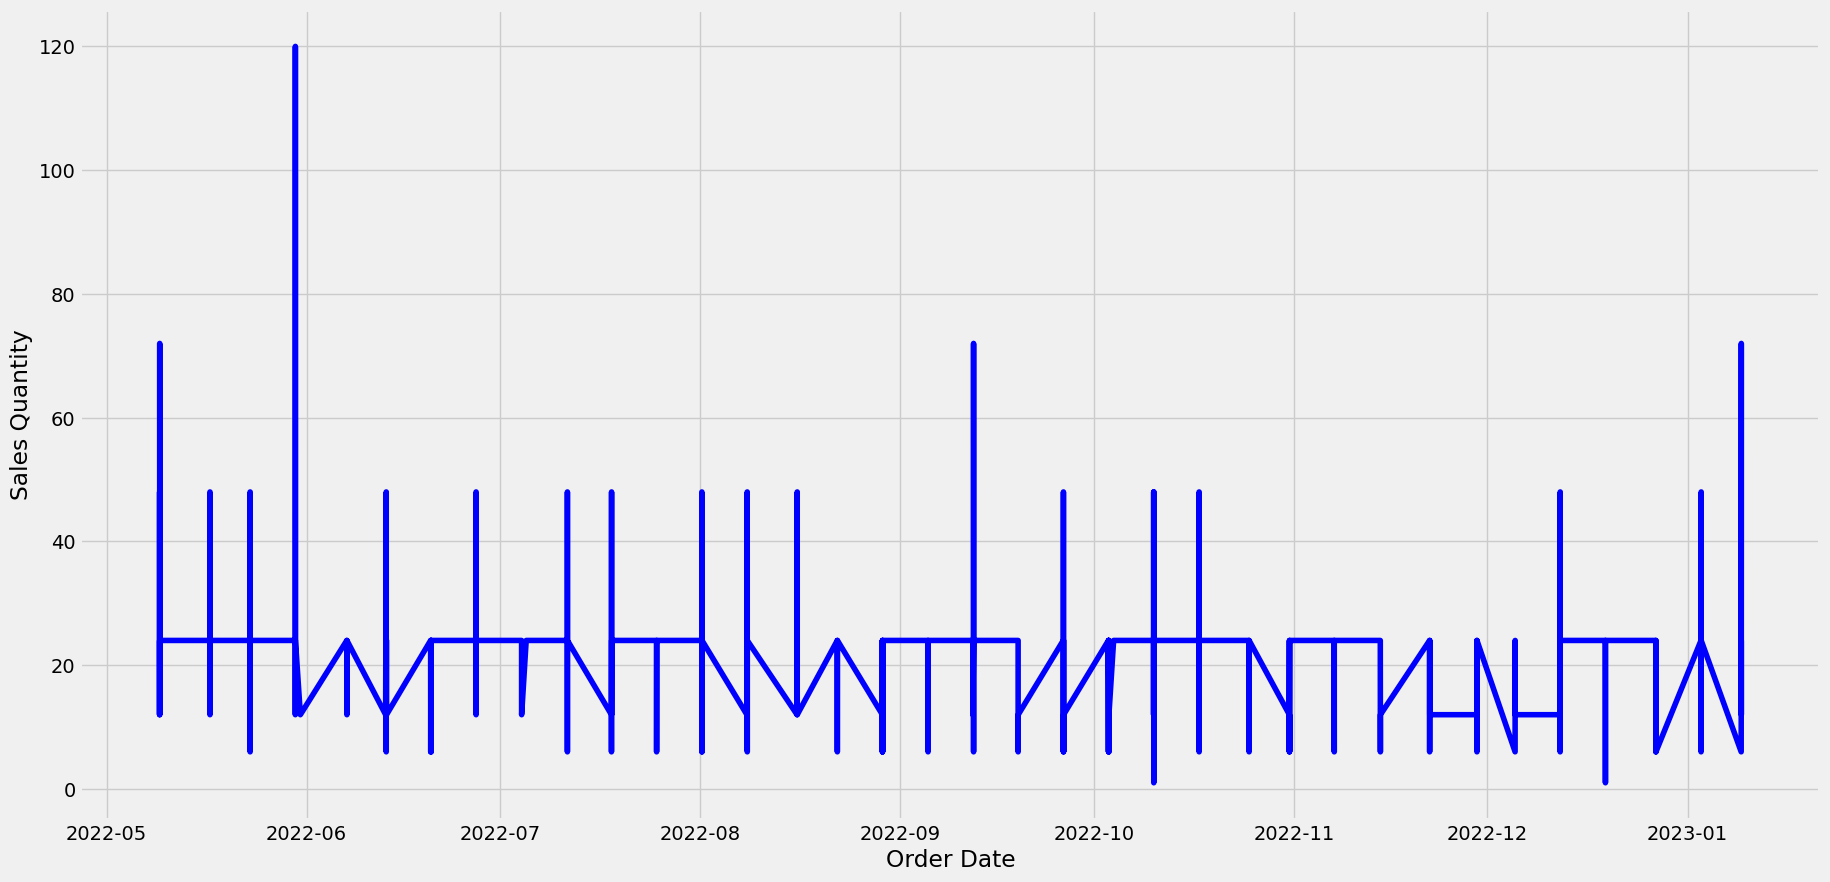

In [18]:
plt.style.use('fivethirtyeight')

# Select the subset of data using datetime indexing
sales_subset = sales['2022-05-01':'2023-05-31']

# Extract the sales_quantity data from the subset
sales_quantity_subset = sales_subset['sales_quantity'] 

plt.figure(figsize=(20, 10))
plt.plot(sales_quantity_subset.index, sales_quantity_subset, color='blue')  
plt.xlabel('Order Date')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.show()

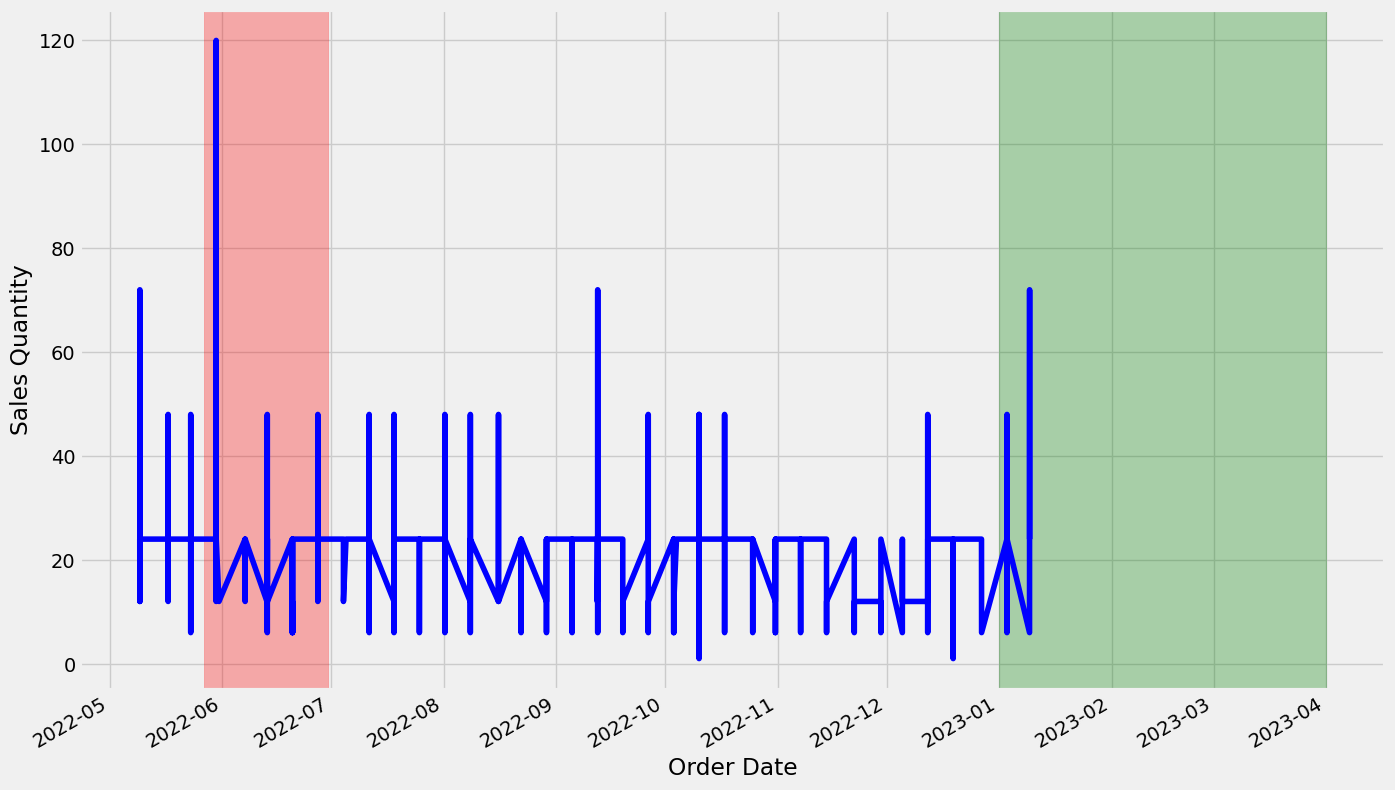

In [19]:
sales_subset = sales['2022-05-01':'2023-05-31']
sales_quantity_subset = sales_subset['sales_quantity']

ax = sales_quantity_subset.plot(color='blue', figsize=(15, 10))
ax.set_xlabel('Order Date')
ax.set_ylabel('Sales Quantity')

ax.axvspan('2022-05-27', '2022-06-30', color='red', alpha=0.3)
ax.axvspan('2023-01-01', '2023-04-01', color='green', alpha=0.3)

plt.show()


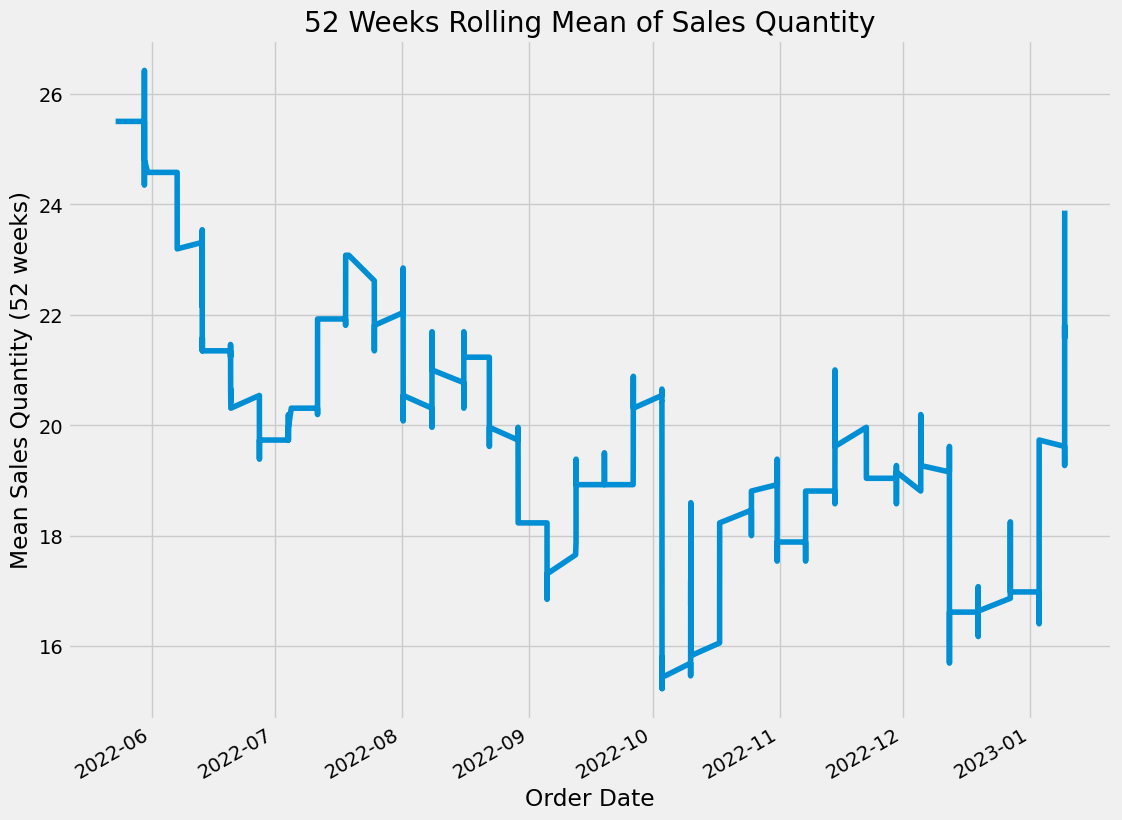

In [20]:
sales_quantity_mean = sales['sales_quantity'].rolling(window=52).mean()

ax = sales_quantity_mean.plot(figsize=(12, 10))

ax.set_xlabel("Order Date")
ax.set_ylabel("Mean Sales Quantity (52 weeks)")
ax.set_title("52 Weeks Rolling Mean of Sales Quantity")

plt.show()

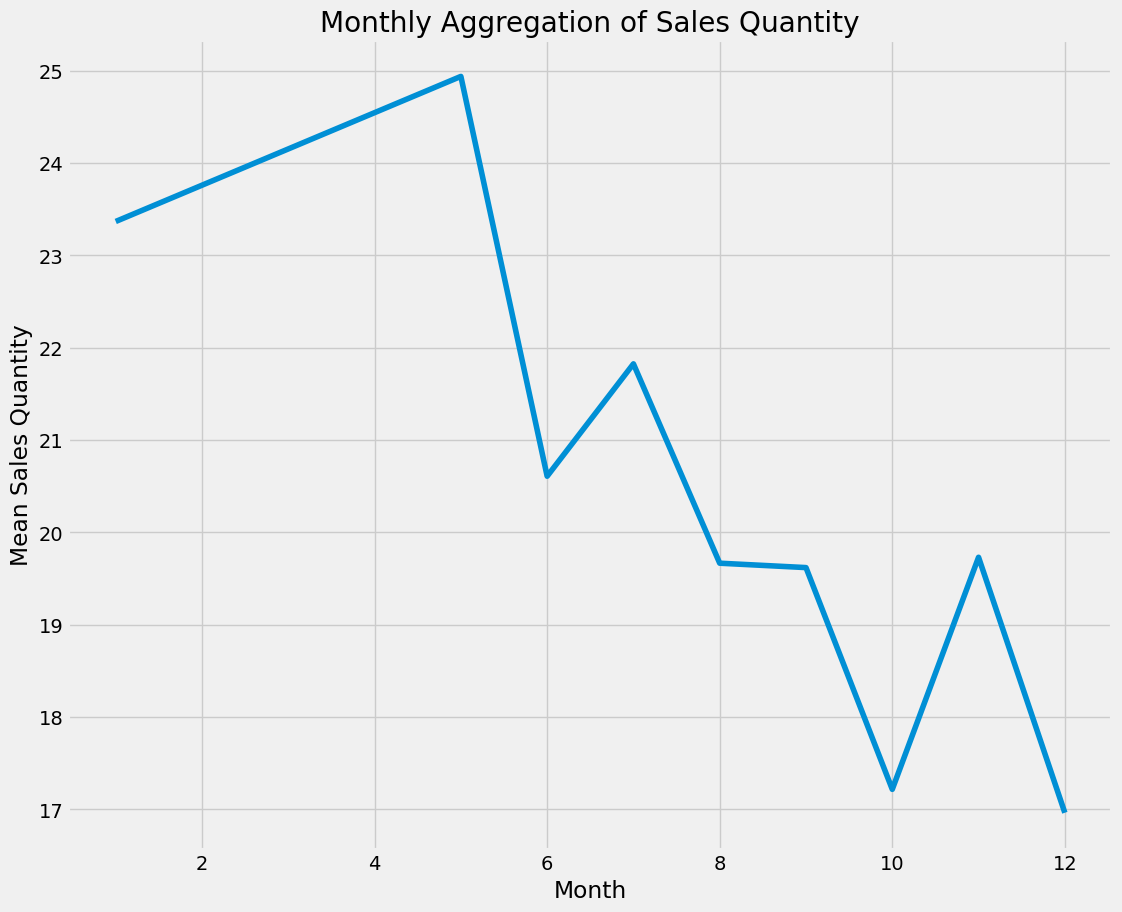

In [21]:
index_month = sales.index.month

sales_by_month = sales.groupby(index_month)['sales_quantity'].mean()

sales_by_month.plot(figsize=(12, 10))
plt.title('Monthly Aggregation of Sales Quantity')
plt.xlabel('Month')
plt.ylabel('Mean Sales Quantity')
plt.show()

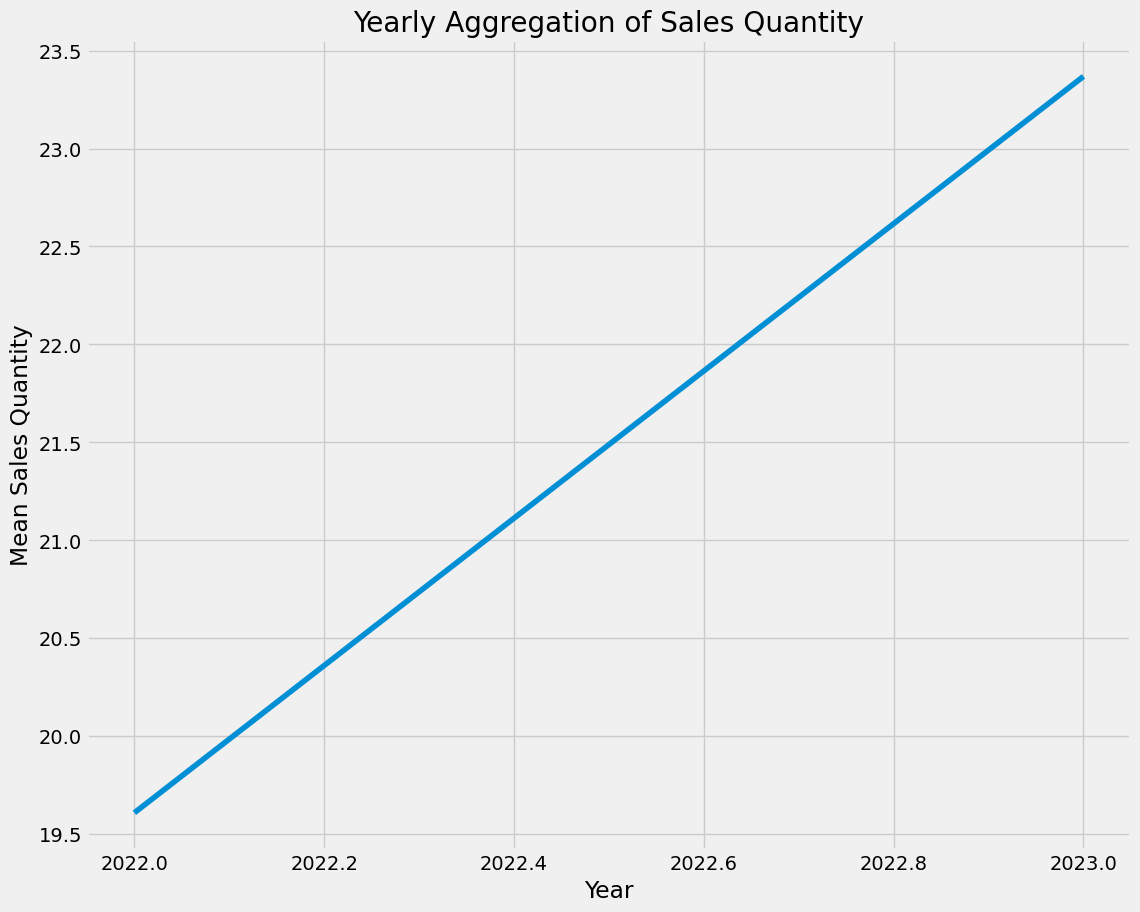

In [22]:
index_year = sales.index.year

sales_by_year = sales.groupby(index_year)['sales_quantity'].mean()

sales_by_year.plot(figsize=(12, 10))
plt.title('Yearly Aggregation of Sales Quantity')
plt.xlabel('Year')
plt.ylabel('Mean Sales Quantity')
plt.show()

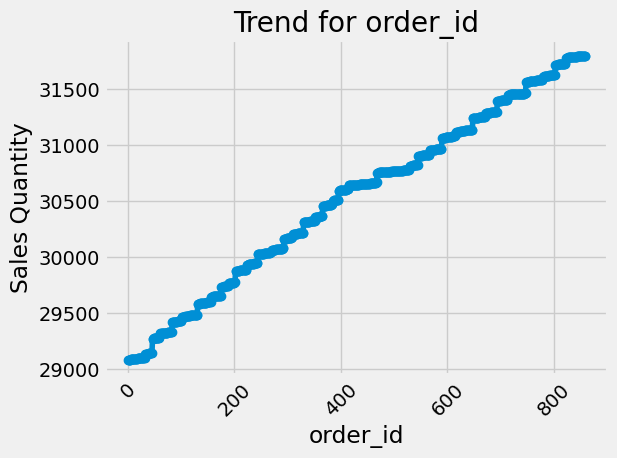

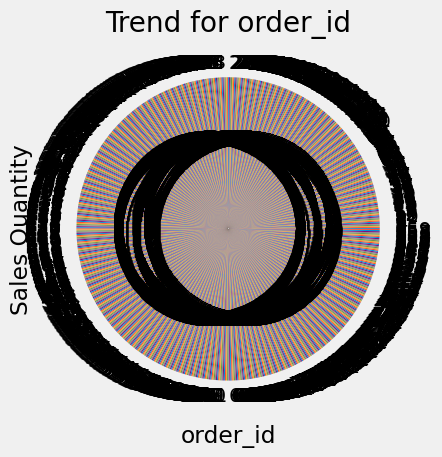

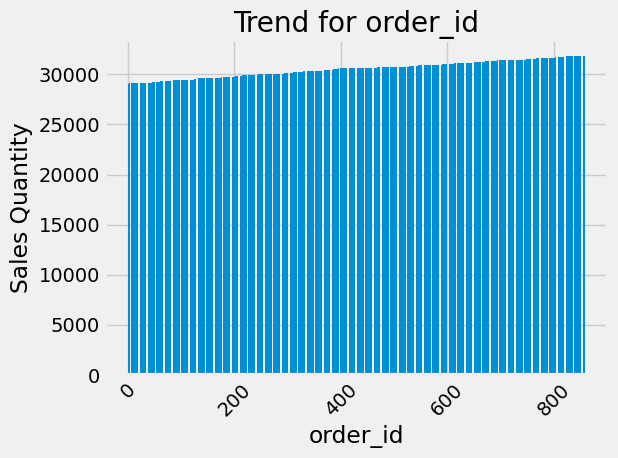

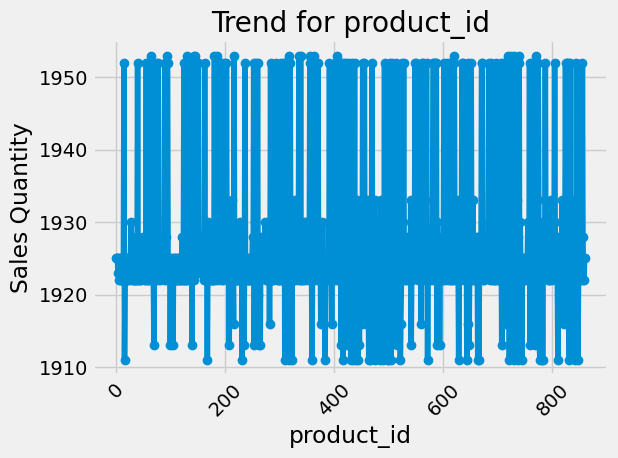

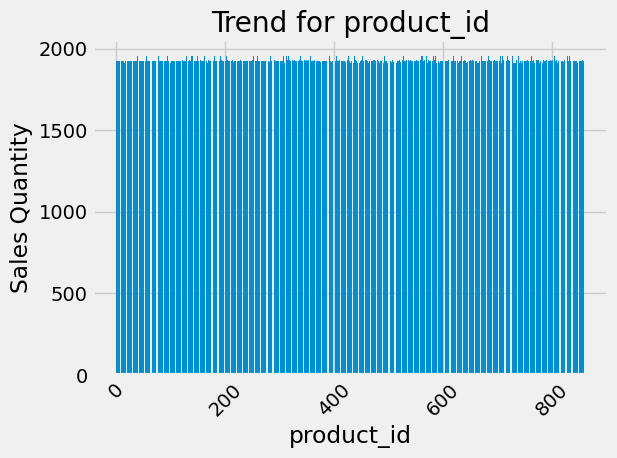

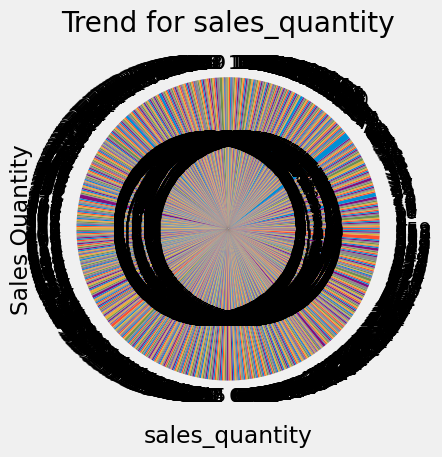

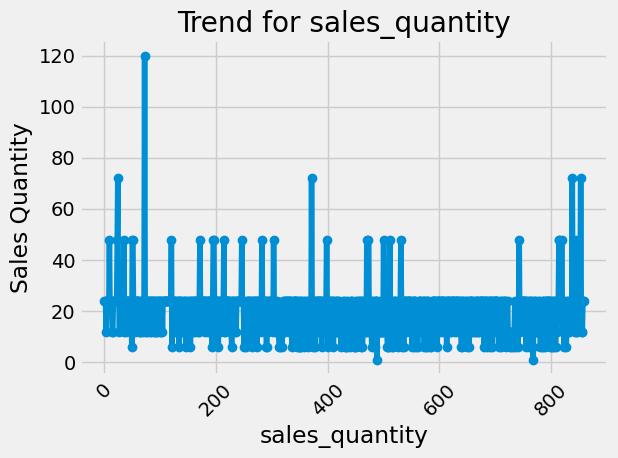

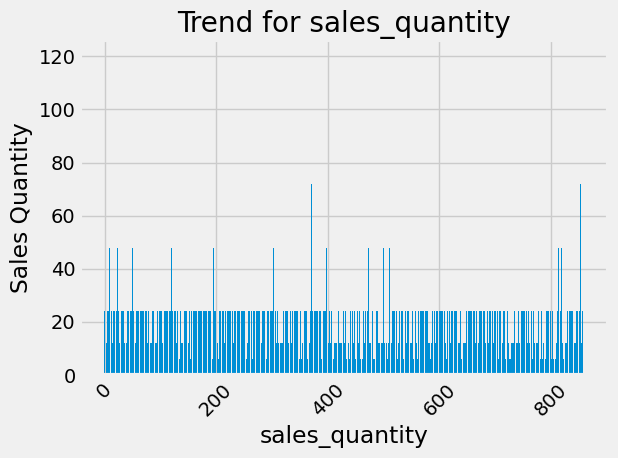

In [23]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def open_csv_and_display_trend():
    # Function to open CSV file and display trend based on user input
    root = tk.Tk()
    root.title("CSV File Selector")

    def read_csv_and_display_trend():
        file_path = filedialog.askopenfilename(title="Select a CSV file", filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                df = pd.read_csv(file_path)
                display_trend_options(df)
            except Exception as e:
                messagebox.showerror("Error", f"Error reading CSV file:\n{e}")

    def display_trend_options(dataframe):
        # Function to display options for selecting trend based on DataFrame header and chart type
        options_frame = ttk.Frame(root)
        options_frame.pack(padx=20, pady=20)

        label = tk.Label(options_frame, text="Select a trend option:")
        label.grid(row=0, column=0, padx=10, pady=10)

        option_var = tk.StringVar()
        option_var.set(dataframe.columns[0])  # Set default option

        option_menu = tk.OptionMenu(options_frame, option_var, *dataframe.columns)
        option_menu.grid(row=0, column=1, padx=10, pady=10)

        chart_type_var = tk.StringVar()
        chart_type_var.set("Line Chart")  # Set default chart type

        chart_type_label = tk.Label(options_frame, text="Select chart type:")
        chart_type_label.grid(row=1, column=0, padx=10, pady=10)

        chart_types = ["Pie Chart", "Line Chart", "Bar Chart"]
        for i, chart_type in enumerate(chart_types):
            chart_radio = tk.Radiobutton(options_frame, text=chart_type, variable=chart_type_var, value=chart_type)
            chart_radio.grid(row=i+2, column=0, padx=10, pady=5, sticky=tk.W)

        def show_trend():
            selected_option = option_var.get()
            selected_chart_type = chart_type_var.get()
            display_trend_in_new_window(dataframe, selected_option, selected_chart_type)

        btn_show_trend = tk.Button(options_frame, text="Show Trend", command=show_trend)
        btn_show_trend.grid(row=len(chart_types)+2, column=0, padx=10, pady=10)

    def display_trend_in_new_window(dataframe, selected_option, selected_chart_type):
        # Function to display trend in a new window based on user-selected option and chart type
        new_window = tk.Toplevel(root)
        new_window.title(f"Trend for {selected_option}")

        try:
            if dataframe[selected_option].dtype in ['int64', 'float64']:
                fig, ax = plt.subplots()
                if selected_chart_type == "Pie Chart":
                    ax.pie(dataframe[selected_option], labels=dataframe.index, autopct='%1.1f%%')
                elif selected_chart_type == "Line Chart":
                    ax.plot(dataframe.index, dataframe[selected_option], marker='o', linestyle='-')
                elif selected_chart_type == "Bar Chart":
                    ax.bar(dataframe.index, dataframe[selected_option])

                ax.set_title(f"Trend for {selected_option}")
                ax.set_xlabel(selected_option)
                ax.set_ylabel("Sales Quantity")
                plt.xticks(rotation=45)
                plt.tight_layout()

                canvas = FigureCanvasTkAgg(fig, master=new_window)
                canvas.draw()
                canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
            else:
                messagebox.showerror("Error", "Selected option must be numeric for Line Chart or Bar Chart.")
        except Exception as e:
            messagebox.showerror("Error", f"Error displaying trend:\n{e}")

    btn_open_csv = tk.Button(root, text="Open CSV File", command=read_csv_and_display_trend)
    btn_open_csv.pack(padx=20, pady=20)

    root.mainloop()

if __name__ == "__main__":
    open_csv_and_display_trend()
